In [1]:
# 04_feature_importance.ipynb
# Feature Importance Analysis with Random Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

In [11]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing Embarked with the most frequent value

In [13]:
# Convert categorical columns to numeric (encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert Sex to numeric (male=0, female=1)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encoding for 'Embarked'

In [15]:
# Prepare the features (X) and target (y)
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]  # Features
y = df['Survived']  # Target (Survival)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Evaluate the model (accuracy)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7932960893854749


In [23]:
# Feature importance
importances = model.feature_importances_

In [25]:
# Create a DataFrame for visualization
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

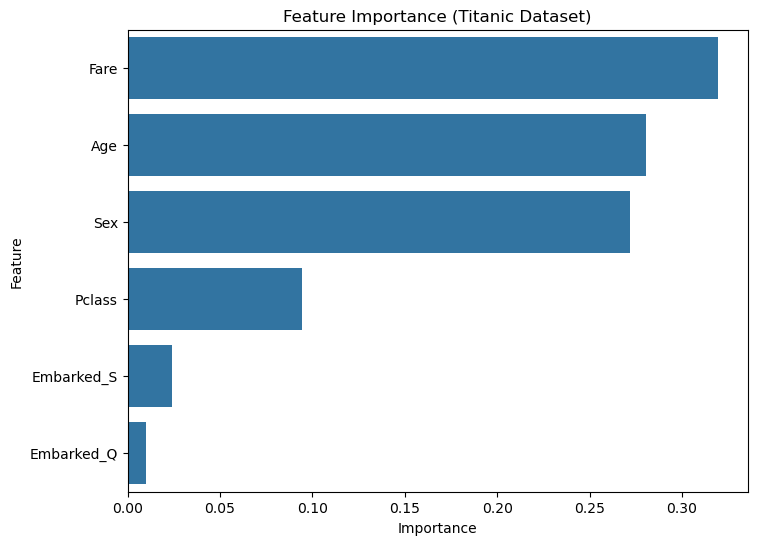

In [27]:
# Visualize feature importance using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importance (Titanic Dataset)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()